# 課程目標

利用Keras 的 CIFAR10 dataset 來驗證損失函數對於模型精確度的影響

# 範例重點: 
    
    模型架構的層數
    
    使用何種LOSS function

In [2]:
#!pip install --user --upgrade jupyter

In [3]:
#!pip install --user --upgrade notebook

In [4]:
#pip install pandas

In [5]:
#pip install numpy

In [6]:
import numpy
import pandas

In [7]:
#pip install tensorflow-gpu 

In [8]:
#pip install keras

In [9]:
import tensorflow as tf
import keras
print("Tensorflow版本為:",tf.__version__)
print("Keras版本為:",keras.__version__)
print("檢查Tensorflow-GPU是否啟用:",tf.config.list_physical_devices('GPU'))

Tensorflow版本為: 2.8.2
Keras版本為: 2.8.0
檢查Tensorflow-GPU是否啟用: []


# 導入必要的libray

In [10]:

from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
#np.random.seed(10)的作用：使得隨機數據可預測

# 資料準備

In [11]:
#取得Keras CIFAR10 Dataset, 並分成Training 與 Test set
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [12]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [13]:
#資料正規化, 並設定 data array 為浮點數
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [14]:
#針對Label 做 ONE HOT ENCODE, 並查看維度資訊
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [16]:
# 宣告採用序列模型
model = Sequential()

In [17]:
#卷積層1與池化層1

In [18]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [19]:
#卷積層2與池化層2

In [20]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [21]:
#卷積層3與池化層3

In [22]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [23]:
#卷積層4與池化層4

In [24]:
model.add(Conv2D(filters=256, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())


In [26]:
#建立全網路連接層
#model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

In [27]:
#建立輸出層
model.add(Dense(10, activation='softmax'))

In [28]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

# 載入之前訓練的模型

In [29]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [30]:
#模型編譯
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [31]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=64, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Epoch 1/12
586/586 [==============================] - 135s 229ms/step - loss: 1.5262 - accuracy: 0.4381 - val_loss: 1.2062 - val_accuracy: 0.5567
Epoch 2/12
586/586 [==============================] - 132s 225ms/step - loss: 1.0546 - accuracy: 0.6238 - val_loss: 0.9484 - val_accuracy: 0.6742
Epoch 3/12
586/586 [==============================] - 130s 222ms/step - loss: 0.8450 - accuracy: 0.7011 - val_loss: 0.8493 - val_accuracy: 0.7063
Epoch 4/12
586/586 [==============================] - 131s 223ms/step - loss: 0.6999 - accuracy: 0.7548 - val_loss: 0.8013 - val_accuracy: 0.7270
Epoch 5/12
586/586 [==============================] - 130s 222ms/step - loss: 0.5828 - accuracy: 0.7951 - val_loss: 0.7915 - val_accuracy: 0.7364
Epoch 6/12
586/586 [==============================] - 130s 222ms/step - loss: 0.4829 - accuracy: 0.8298 - val_loss: 0.8000 - val_accuracy: 0.7399
Epoch 7/12
586/586 [==============================] - 130s 222ms/step - loss: 0.3823 - accuracy: 0.8664 - val_loss: 0.8692 -

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

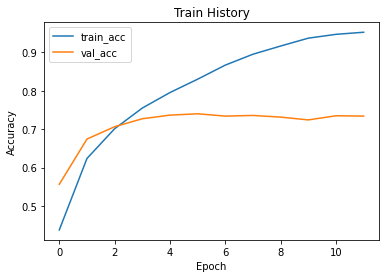

In [35]:
show_train_history('accuracy','val_accuracy')

In [36]:
!python -V

Python 3.7.13
